<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/homework-1/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 4

Work on the digits dataset to classify handwritten digits using the provided Digits.zip on Canvas. ZipDigits.train is the training dataset and ZipDigits.test is the test dataset. The first column in the dataset is the digit label, and the next 256 columns are values between -1 and 1 representing a grayscale image.


You will need to preprocess the data to get these labels. Take some time to familiarize yourself with the dataset. We will work on this dataset throughout the course. Do the following preprocessing steps for both training and testing datasets:


Filter the dataset to include only digits labeled as ‘1’ and ‘5’. Convert the labels into labels for binary classification, i.e., ‘1’ and ‘-1’.


Extract intensity and symmetry features on the dataset as discussed in the class. You may use your own mathematical definition of the two features. In the written part of the submission, include the definition you used.


For the training dataset, plot a 2D scatter plot with the two features you extracted. Use different colors and/or markers for the different classes. Submit the plot on the written part of your submission.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


train_data = np.loadtxt('ZipDigits.train')
test_data = np.loadtxt('ZipDigits.test')


train_data = train_data[(train_data[:, 0] == 1) | (train_data[:, 0] == 5)]
test_data = test_data[(test_data[:, 0] == 1) | (test_data[:, 0] == 5)]

train_data[:, 0] = np.where(train_data[:, 0] == 1, 1, -1)
test_data[:, 0] = np.where(test_data[:, 0] == 1, 1, -1)


In [ ]:

def intensity_feature(image):
    return np.mean(image[1:])


In [ ]:
# Symmetry feature extraction function
def symmetry_feature(image):
    image = image.reshape(16, 16)  # Reshape to a 16x16 image
    left_half = image[:, :8]  # Left half of the image
    right_half = np.fliplr(image[:, 8:])  # Right half of the image (flipped horizontally)

    # Calculate the absolute difference between corresponding pixel values
    diff = np.abs(left_half - right_half)

    # Calculate the mean of the absolute differences as the symmetry feature
    return np.mean(diff)


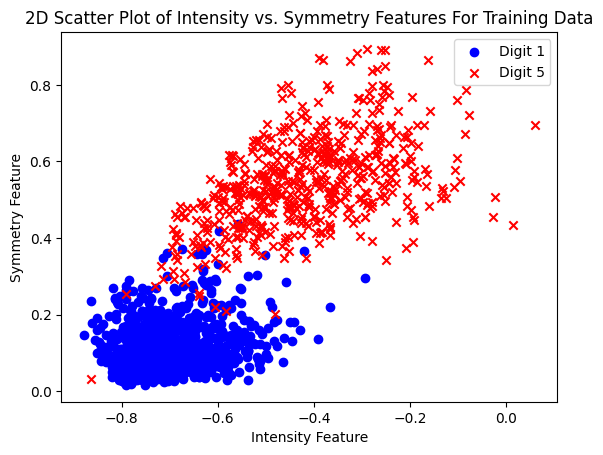

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load training data
train_data = np.loadtxt('ZipDigits.train')

# Filter the dataset to include only digits labeled as '1' and '5'
train_data = train_data[(train_data[:, 0] == 1) | (train_data[:, 0] == 5)]

# Convert labels to binary classification labels ('1' and '-1')
train_data[:, 0] = np.where(train_data[:, 0] == 1, 1, -1)

# Extract intensity and symmetry features for the training data
train_intensity = [intensity_feature(data[1:]) for data in train_data]
train_symmetry = [symmetry_feature(data[1:]) for data in train_data]

# Separate data points for '1' and '-1' using boolean masks
ones_mask = train_data[:, 0] == 1
minus_ones_mask = train_data[:, 0] == -1

# Create scatter plot
plt.scatter(np.array(train_intensity)[ones_mask], np.array(train_symmetry)[ones_mask], label='Digit 1', c='blue', marker='o')
plt.scatter(np.array(train_intensity)[minus_ones_mask], np.array(train_symmetry)[minus_ones_mask], label='Digit 5', c='red', marker='x')

# Add labels and legend
plt.xlabel('Intensity Feature')
plt.ylabel('Symmetry Feature')
plt.legend(loc='best')

# Show the plot
plt.title('2D Scatter Plot of Intensity vs. Symmetry Features For Training Data')
plt.show()


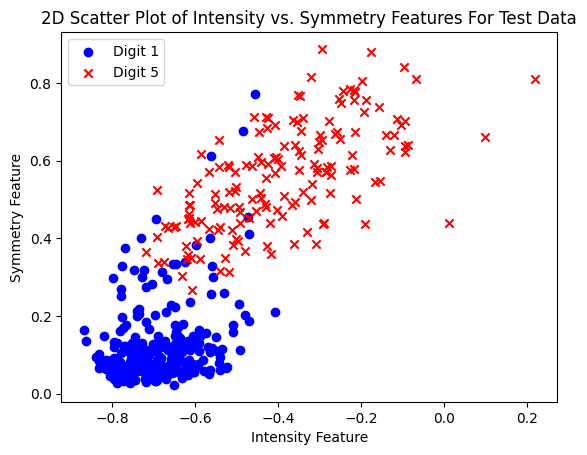

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the intensity feature extraction function
def intensity_feature(image):
    return np.mean(image[1:])

# Define the symmetry feature extraction function
def symmetry_feature(image):
    image = image.reshape(16, 16)  # Reshape to a 16x16 image
    left_half = image[:, :8]  # Left half of the image
    right_half = np.fliplr(image[:, 8:])  # Right half of the image (flipped horizontally)

    # Calculate the absolute difference between corresponding pixel values
    diff = np.abs(left_half - right_half)

    # Calculate the mean of the absolute differences as the symmetry feature
    return np.mean(diff)

# Load testing data
test_data = np.loadtxt('ZipDigits.test')

# Filter the dataset to include only digits labeled as '1' and '5'
test_data = test_data[(test_data[:, 0] == 1) | (test_data[:, 0] == 5)]

# Convert labels to binary classification labels ('1' and '-1')
test_data[:, 0] = np.where(test_data[:, 0] == 1, 1, -1)

# Extract intensity and symmetry features for the test data
test_intensity = [intensity_feature(data[1:]) for data in test_data]
test_symmetry = [symmetry_feature(data[1:]) for data in test_data]

# Separate data points for '1' and '-1' using boolean masks
ones_mask = test_data[:, 0] == 1
minus_ones_mask = test_data[:, 0] == -1

# Create scatter plot
plt.scatter(np.array(test_intensity)[ones_mask], np.array(test_symmetry)[ones_mask], label='Digit 1', c='blue', marker='o')
plt.scatter(np.array(test_intensity)[minus_ones_mask], np.array(test_symmetry)[minus_ones_mask], label='Digit 5', c='red', marker='x')

# Add labels and legend
plt.xlabel('Intensity Feature')
plt.ylabel('Symmetry Feature')
plt.legend(loc='best')

# Show the plot
plt.title('2D Scatter Plot of Intensity vs. Symmetry Features For Test Data')
plt.show()


References

- ChatGPT and Bard
-https://courses.cs.washington.edu/courses/cse446/18wi/slides/perceptron2.pdf
-https://www.youtube.com/watch?v=4Gac5I64LM4


Discussed With Shashank